# Let's find out the Disney Plus!!!
## And how they are formed!!

## Import Libraries & Font & File

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [111]:
#Only for publishing
import warnings
warnings.filterwarnings('ignore')

In [112]:
plt.rc('font', family='Arial Unicode MS') # For MacOS
mpl.rcParams['axes.unicode_minus'] = False  

In [113]:
#Bring file into the notebook
dp = pd.read_csv('/Users/dtive/Documents/GitHub/Kaggle/DisneyPlus-Analysis/data/disney_plus_titles.csv')

## Observe & Ananyze Data 

In [114]:
1#Analyze the heads of the data
dp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [115]:
#do not abbreviate the columns
pd.set_option('display.max_columns', None)
dp.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [116]:
#make new dataframe with this dp['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts()
dp_genres = dp['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts().to_frame().reset_index()
dp_genres


#if movie or tv show has genre, it will be 1, if not, it will be 0
dp['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().unique()

#make new column for each genre and make new dataframe
for genre in dp['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().unique():
    dp[genre] = dp['listed_in'].str.contains(genre).astype(int)

dp.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Animation,Family,Comedy,Musical,Docuseries,Historical,Music,Biographical,Documentary,Action-Adventure,Superhero,Reality,Survival,Animals & Nature,Kids,Coming of Age,Drama,Fantasy,Lifestyle,Science Fiction,Concert Film,Crime,Sports,Anthology,Medical,Variety,Spy/Espionage,Buddy,Parody,Game Show / Competition,Romance,Anime,Romantic Comedy,Thriller,Police/Cop,Talk Show,Western,Dance,Series,Mystery,Soap Opera / Melodrama,Disaster,Travel
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
#divide date_added into year by comma
dp['year_added'] = dp['date_added'].str.split(',').str[1].str.strip()
dp.head(5)



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Animation,Family,Comedy,Musical,Docuseries,Historical,Music,Biographical,Documentary,Action-Adventure,Superhero,Reality,Survival,Animals & Nature,Kids,Coming of Age,Drama,Fantasy,Lifestyle,Science Fiction,Concert Film,Crime,Sports,Anthology,Medical,Variety,Spy/Espionage,Buddy,Parody,Game Show / Competition,Romance,Anime,Romantic Comedy,Thriller,Police/Cop,Talk Show,Western,Dance,Series,Mystery,Soap Opera / Melodrama,Disaster,Travel,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021


In [118]:
#release year desc
dp['release_year'].value_counts().sort_index(ascending=False)


2021    125
2020    114
2019     99
2018     65
2017     69
       ... 
1935      4
1934      4
1933      3
1932      3
1928      1
Name: release_year, Length: 90, dtype: int64

In [119]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   show_id                  1450 non-null   object
 1   type                     1450 non-null   object
 2   title                    1450 non-null   object
 3   director                 977 non-null    object
 4   cast                     1260 non-null   object
 5   country                  1231 non-null   object
 6   date_added               1447 non-null   object
 7   release_year             1450 non-null   int64 
 8   rating                   1447 non-null   object
 9   duration                 1450 non-null   object
 10  listed_in                1450 non-null   object
 11  description              1450 non-null   object
 12  Animation                1450 non-null   int64 
 13  Family                   1450 non-null   int64 
 14  Comedy                   1450 non-null  

## Cleaning Data

In [120]:
#fill in the missing values
dp['director'].fillna('Not Specified', inplace=True)
dp['cast'].fillna('Not Specified', inplace=True)
dp['country'].fillna('Not Specified', inplace=True)
dp['date_added'].fillna('Not Specified', inplace=True)
dp['rating'].fillna('No Rating', inplace=True)


In [121]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   show_id                  1450 non-null   object
 1   type                     1450 non-null   object
 2   title                    1450 non-null   object
 3   director                 1450 non-null   object
 4   cast                     1450 non-null   object
 5   country                  1450 non-null   object
 6   date_added               1450 non-null   object
 7   release_year             1450 non-null   int64 
 8   rating                   1450 non-null   object
 9   duration                 1450 non-null   object
 10  listed_in                1450 non-null   object
 11  description              1450 non-null   object
 12  Animation                1450 non-null   int64 
 13  Family                   1450 non-null   int64 
 14  Comedy                   1450 non-null  

In [122]:
#check duplicates
dp.duplicated('title')


0       False
1       False
2       False
3       False
4       False
        ...  
1445    False
1446    False
1447    False
1448    False
1449    False
Length: 1450, dtype: bool

## Disney Colors

### I will use disney colors to make the plots more attractive

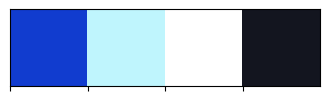

In [123]:
#disney color palette
disney_palette = ['#113CCF','#BFF5FD','#FFFFFF', '#13151F']

#show disney color palette
sns.palplot(disney_palette)


## Movies vs TV Shows

In [124]:
#find the number of movies and tv shows
dp['type'].value_counts()

#find the number of movies and tv shows pie chart use plotly, color manually
fig = px.pie(dp, values=dp['type'].value_counts(), names=dp['type'].value_counts().index, color_discrete_sequence=disney_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Number of Movies and TV Shows')
fig.show()





More than 70% of Movies in Disney Plus

In [125]:
#all added movies and tvshows by year
dp_r_all = dp['release_year'].value_counts().sort_index(ascending=False)

#yearly added movies by year, only movies in type
dp_r_movies = dp[dp['type'] == 'Movie']
dp_r_movies['release_year'].value_counts().sort_index(ascending=False)


#yearly added tv shows by year, only movies in type
dp_r_tv = dp[dp['type'] == 'TV Show']
dp_r_tv['release_year'].value_counts().sort_index(ascending=False)

#make graph by dp_r_all, dp_movies and dp_tv by line graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=dp_r_all.index, y=dp_r_all.values, name='All', line=dict(color=disney_palette[0], width=4)))
fig.add_trace(go.Scatter(x=dp_r_movies['release_year'].value_counts().sort_index(ascending=False).index, y=dp_r_movies['release_year'].value_counts().sort_index(ascending=False).values, name='Movies', line=dict(color=disney_palette[1], width=4)))
fig.add_trace(go.Scatter(x=dp_r_tv['release_year'].value_counts().sort_index(ascending=False).index, y=dp_r_tv['release_year'].value_counts().sort_index(ascending=False).values, name='TV Shows', line=dict(color=disney_palette[3], width=4)))
fig.update_layout(title_text='Number of Movies and TV Shows by Release Year')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of Movies and TV Shows')
fig.show()

Keep growing in all categories

Maybe because of M&A, they could make more movies and TV Shows

In [126]:
#number of movies added each year, number of tv shows added each year, number of movies and tv shows added each year
fig = go.Figure()
fig.add_trace(go.Scatter(x=dp[dp['type'] == 'Movie'].groupby('year_added').count().reset_index()['year_added'], y=dp[dp['type'] == 'Movie'].groupby('year_added').count().reset_index()['title'], name='Movies Added', line_color=disney_palette[0]))
fig.add_trace(go.Scatter(x=dp[dp['type'] == 'TV Show'].groupby('year_added').count().reset_index()['year_added'], y=dp[dp['type'] == 'TV Show'].groupby('year_added').count().reset_index()['title'], name='TV Shows Added', line_color=disney_palette[1]))
fig.add_trace(go.Scatter(x=dp.groupby('year_added').count().reset_index()['year_added'], y=dp.groupby('year_added').count().reset_index()['title'], name='Total Added', line_color=disney_palette[3]))
fig.update_layout(title_text='Number of Movies and TV Shows Added by Year')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Year Added')
#y axis name
fig.update_yaxes(title_text='Number of Movies and TV Shows Added')
fig.show()

But, added contents are gradually decreasing from 2020 to 2021

2019 is the opening for Disney Plus, so they could add all their contents, so it is exceptional

## Genre

In [127]:
#find genres of movies and tv shows
dp['listed_in'].value_counts()

#with the commma, we can split the genres
dp['listed_in'].str.split(',').explode().value_counts()

#find the number of movies and tv shows by genre
dp['listed_in'].str.split(',').explode().value_counts()

#remove the space in front of the genre
dp['listed_in'].str.split(',').explode().str.strip().value_counts()

#find the number of movies and tv shows by genre
dp['listed_in'].str.split(',').explode().str.strip().value_counts()

#remove if there is TV Shows, Movies, Tv in the genre
dp['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').value_counts()

#remove space in front of the genre
dp['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().value_counts()

#drop blank genre
dp['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts()

#make graph of the number of movies and tv shows by genre with plotly
#opposite color
fig = px.bar(dp['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts(), color=dp['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts(), color_continuous_scale=disney_palette[::-1])
fig.update_layout(title_text='Number of Movies and TV Shows by Genre')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis label
fig.update_xaxes(title_text='Genre')
fig.show()


Definitely famlily movies are the most number followed by Animation, which shows Disney had been aiming for family and kids

In [128]:
Genres = dp['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts()
#drop second column
Genres = Genres.reset_index()
#rename columns
Genres.columns = ['Genre', 'Count']
#make list of genres
Genres = Genres['Genre'].to_list()
Genres

['Family',
 'Animation',
 'Comedy',
 'Action-Adventure',
 'Animals & Nature',
 'Coming of Age',
 'Fantasy',
 'Documentary',
 'Kids',
 'Drama',
 'Docuseries',
 'Science Fiction',
 'Historical',
 'Music',
 'Musical',
 'Sports',
 'Biographical',
 'Buddy',
 'Anthology',
 'Reality',
 'Romance',
 'Superhero',
 'Crime',
 'Variety',
 'Mystery',
 'Game Show / Competition',
 'Parody',
 'Survival',
 'Lifestyle',
 'Concert Film',
 'Western',
 'Medical',
 'Dance',
 'Thriller',
 'Anime',
 'Series',
 'Spy/Espionage',
 'Romantic Comedy',
 'Soap Opera / Melodrama',
 'Disaster',
 'Police/Cop',
 'Talk Show',
 'Travel']

In [129]:
#graph of different genres by release year
fig = px.line(dp.groupby('release_year').sum().reset_index(), x='release_year', y=dp.groupby('release_year').sum().reset_index().columns[1:])
fig.update_layout(title_text='Number of Movies and TV Shows by Release Year by Genre')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Release Year')
#y axis name
fig.update_yaxes(title_text='Number of Movies and TV Shows')
fig.show()

2019, 2020, they definately released family movies a lot

## Find Genre trend

In [130]:
#group by release year and find the different genres count
dp.groupby('release_year').sum().reset_index()


,release_year,Animation,Family,Comedy,Musical,Docuseries,Historical,Music,Biographical,Documentary,Action-Adventure,Superhero,Reality,Survival,Animals & Nature,Kids,Coming of Age,Drama,Fantasy,Lifestyle,Science Fiction,Concert Film,Crime,Sports,Anthology,Medical,Variety,Spy/Espionage,Buddy,Parody,Game Show / Competition,Romance,Anime,Romantic Comedy,Thriller,Police/Cop,Talk Show,Western,Dance,Series,Mystery,Soap Opera / Melodrama,Disaster,Travel
0,1928,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1932,3,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1933,3,3,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1934,4,4,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1935,4,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2017,28,25,13,3,11,5,3,2,14,21,1,3,0,16,13,5,3,10,3,4,0,0,2,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
86,2018,16,25,16,3,16,4,4,0,15,19,1,0,0,21,11,5,1,7,1,6,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
87,2019,26,43,21,1,22,13,6,2,24,28,3,6,2,17,6,11,5,9,1,5,1,0,1,3,1,0,0,2,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
88,2020,25,41,17,7,23,9,15,7,33,14,0,5,1,33,3,9,9,11,1,1,1,1,1,6,1,3,0,2,1,3,1,1,0,0,0,0,0,1,0,0,0,0,0


In [131]:
#group by release year and find the average genre
dp.groupby('release_year').sum().reset_index()

#make graph of the average genre by release year just 10 years
fig = px.line(dp.groupby('release_year').sum().reset_index().iloc[-10:], x='release_year', y=dp.groupby('release_year').sum().reset_index().iloc[-10:].columns[1:])
fig.update_layout(title_text='Sum of Genre by Release Year')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Release Year')
#y axis name
fig.update_yaxes(title_text='Sum of Genre')
#title
fig.update_layout(title_text='Sum of Genre in 10 Year')
fig.show()



More close look of Genre trend in 10 years

In [132]:
#group by year added and find the average genre exclude release year
dp.groupby('year_added').sum().reset_index().drop('release_year', axis=1)

#make graph of the average genre by year added just 10 years
fig = px.line(dp.groupby('year_added').sum().reset_index().iloc[-10:].drop('release_year', axis=1), x='year_added', y=dp.groupby('year_added').sum().reset_index().iloc[-10:].drop('release_year', axis=1).columns[1:])
fig.update_layout(title_text='Sum of Genre by Year Added')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Year Added')
#y axis name
fig.update_yaxes(title_text='Sum of Genre')
fig.show()



Added contents are quite different, maybe they added all of their contents? Or for trend, we need more data over time

## Rating Categories

In [133]:
#count the number of ratings
dp['rating'].value_counts()

#excclude last 3 ratings
dp['rating'].value_counts()[:-3]

#make graph of the number of ratings
fig = px.bar(dp['rating'].value_counts()[:-3], color=dp['rating'].value_counts()[:-3], color_continuous_scale=disney_palette[::-1])
fig.update_layout(title_text='Number of Ratings')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis label
fig.update_xaxes(title_text='Rating')
fig.show()


In rating, TV-G is the most rated category, which is for all ages

## Find rating trend

In [134]:
#make column TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G','NR', 'G', 'TV-Y7-FV', 'No Rating', 'NC-17', 'UR' and if is same with the rating, then 1, else 0
dp['TV-MA'] = np.where(dp['rating'] == 'TV-MA', 1, 0)
dp['TV-14'] = np.where(dp['rating'] == 'TV-14', 1, 0)
dp['TV-PG'] = np.where(dp['rating'] == 'TV-PG', 1, 0)
dp['R'] = np.where(dp['rating'] == 'R', 1, 0)
dp['PG-13'] = np.where(dp['rating'] == 'PG-13', 1, 0)
dp['TV-Y7'] = np.where(dp['rating'] == 'TV-Y7', 1, 0)
dp['TV-Y'] = np.where(dp['rating'] == 'TV-Y', 1, 0)
dp['PG'] = np.where(dp['rating'] == 'PG', 1, 0)
dp['TV-G'] = np.where(dp['rating'] == 'TV-G', 1, 0)
dp['NR'] = np.where(dp['rating'] == 'NR', 1, 0)
dp['G'] = np.where(dp['rating'] == 'G', 1, 0)
dp['TV-Y7-FV'] = np.where(dp['rating'] == 'TV-Y7-FV', 1, 0)
dp['No Rating'] = np.where(dp['rating'] == 'No Rating', 1, 0)
dp['NC-17'] = np.where(dp['rating'] == 'NC-17', 1, 0)
dp['UR'] = np.where(dp['rating'] == 'UR', 1, 0)

dp.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Animation,Family,Comedy,Musical,Docuseries,Historical,Music,Biographical,Documentary,Action-Adventure,Superhero,Reality,Survival,Animals & Nature,Kids,Coming of Age,Drama,Fantasy,Lifestyle,Science Fiction,Concert Film,Crime,Sports,Anthology,Medical,Variety,Spy/Espionage,Buddy,Parody,Game Show / Competition,Romance,Anime,Romantic Comedy,Thriller,Police/Cop,Talk Show,Western,Dance,Series,Mystery,Soap Opera / Melodrama,Disaster,Travel,year_added,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y7,TV-Y,PG,TV-G,NR,G,TV-Y7-FV,No Rating,NC-17,UR
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Not Specified,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Not Specified,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Not Specified,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,The Beatles: Get Back,Not Specified,"John Lennon, Paul McCartney, George Harrison, ...",Not Specified,"November 25, 2021",2021,No Rating,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [135]:
#yearly count of each rating, TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G','NR', 'G', 'TV-Y7-FV', 'No Rating', 'NC-17', 'UR'
dp_rating_ya = dp.groupby('year_added')['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G','NR', 'G', 'TV-Y7-FV', 'No Rating', 'NC-17', 'UR'].sum().reset_index()
dp_rating_ry = dp.groupby('release_year')['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G','NR', 'G', 'TV-Y7-FV', 'No Rating', 'NC-17', 'UR'].sum().reset_index()

In [136]:
#lisst of 'TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G','NR', 'G', 'TV-Y7-FV', 'No Rating', 'NC-17', 'UR'
rating_list = ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G','NR', 'G', 'TV-Y7-FV', 'No Rating', 'NC-17', 'UR']
rating_list

['TV-MA',
 'TV-14',
 'TV-PG',
 'R',
 'PG-13',
 'TV-Y7',
 'TV-Y',
 'PG',
 'TV-G',
 'NR',
 'G',
 'TV-Y7-FV',
 'No Rating',
 'NC-17',
 'UR']

In [137]:
dp_rating_ry

,release_year,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y7,TV-Y,PG,TV-G,NR,G,TV-Y7-FV,No Rating,NC-17,UR
0,1928,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1932,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0
2,1933,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0
3,1934,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0
4,1935,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2017,0,4,24,0,4,10,9,8,6,0,4,0,0,0,0
86,2018,0,4,20,0,5,6,4,7,16,0,2,1,0,0,0
87,2019,0,5,42,0,4,5,5,12,18,0,5,2,1,0,0
88,2020,0,20,46,0,3,1,3,12,20,0,6,3,0,0,0


In [138]:
#make graph of the average rating by release year just 10 years by dp_rating_ry
fig = px.line(dp_rating_ry.iloc[-10:], x='release_year', y=dp_rating_ry.iloc[-10:].columns[1:])
fig.update_layout(title_text='Sum of Rating by Release Year')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Release Year')
#y axis name
fig.update_yaxes(title_text='Average Rating')
#title
fig.update_layout(title_text='Sum of Rating in 10 Year')
fig.show()

But these 10 years, they released TV-MA a lot, which is for mature audiences

In [139]:
#make graph of the average rating by release year just 10 years by dp_rating
fig = px.line(dp_rating_ya.iloc[-10:], x='year_added', y=dp_rating_ya.iloc[-10:].columns[1:])
fig.update_layout(title_text='Sum of Rating by Year Added')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Year Added')
#y axis name
fig.update_yaxes(title_text='Average Rating')
fig.show()

At first release of Disney Plus, they released TV-G and G a lot, which the ones they had before

In [140]:
import nltk
from nltk.tokenize import word_tokenize

# Download the NLTK corpus and models
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


# Define a function to identify nouns, adjectives, and verbs
def extract_pos(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    pos = [word for word, tag in pos_tags if tag.startswith('N') or tag.startswith('J') or tag.startswith('V')]
    return " ".join(pos)

# Analyze description with genre
for genre in dp['listed_in'].unique():
    genre_df = dp[dp['listed_in'] == genre]
    description = " ".join(genre_df['description'].fillna(""))
    pos = extract_pos(description)
    words = pd.Series(pos.split(" "))
    word_counts = words.value_counts()
    


[nltk_data] Downloading package punkt to /Users/dtive/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dtive/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


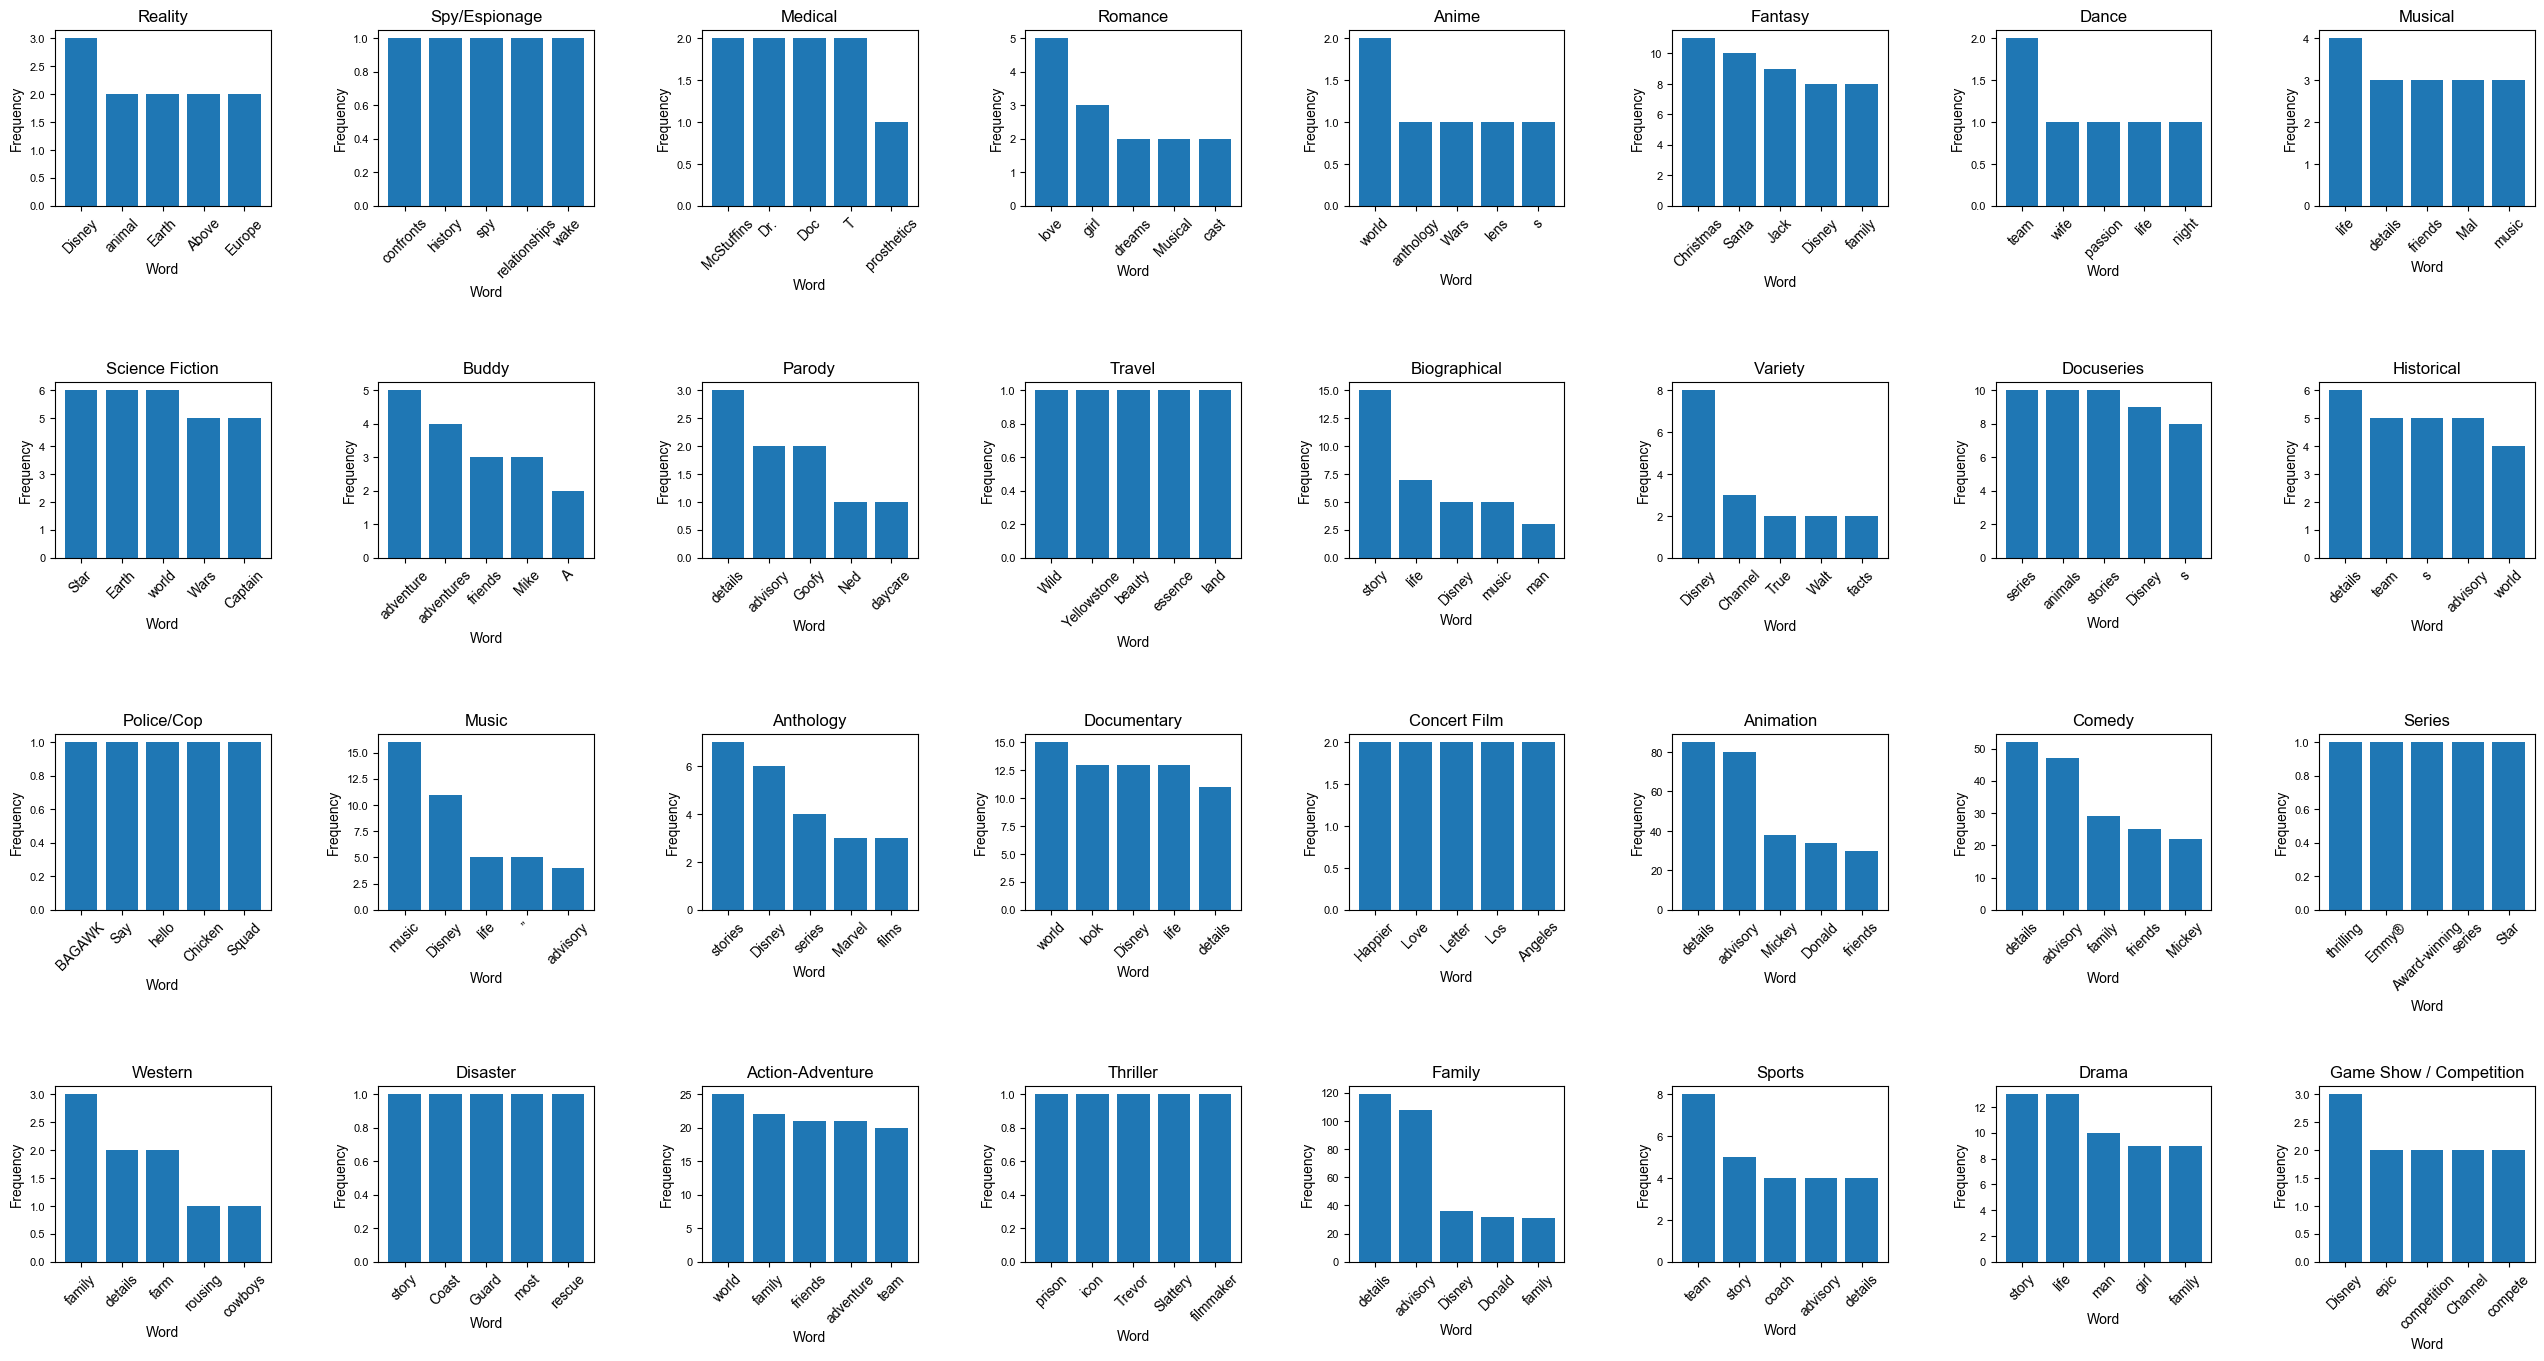

In [141]:
# Define a function to identify nouns, adjectives, and verbs (excluding "be" verbs)
def extract_pos(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    pos = [word for word, tag in pos_tags if tag.startswith('N') or (tag.startswith('J') and tag != 'JJ') or (tag.startswith('V') and not tag.startswith('VB')) and '-' not in word and "'" not in word]
    return pos

# Define the list of genres
genres = dp['listed_in'].str.split(", ")
genres = set([item for sublist in genres for item in sublist])

# Create a 8x4 subplot grid for the plots
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(32, 16))
axs = axs.flatten()
# Remove any unused subplots
for ax in axs[len(genres):]:
    ax.remove()

#space between subplots
fig.subplots_adjust(hspace=0.8, wspace=0.5)

for i, genre in enumerate(genres):
    # Check that the index is valid
    if i < len(axs):
        # Filter the dataframe to include only titles in the chosen genre
        genre_df = dp[dp['listed_in'].str.contains(genre)]

        # Combine all descriptions into a single string
        description = " ".join(genre_df['description'].fillna(""))

        # Extract the nouns, adjectives, and verbs (excluding "be" verbs and words with "-") from the descriptions
        pos = extract_pos(description)
        words = pd.Series(pos)

        #exclude '-' and "'" in words
        words = words[~words.str.contains('–')]
        words = words[~words.str.contains('’')]

        # Count the frequency of each word and select the top 10
        word_counts = words.value_counts().sort_values(ascending=False)
        top_words = word_counts.head(5)

        # Create a bar chart showing the top 10 most common words
        axs[i].bar(top_words.index, top_words.values)
        axs[i].set_title(genre)
        axs[i].set_xlabel("Word")
        axs[i].set_ylabel("Frequency")
        axs[i].tick_params(axis='x', labelrotation=45)
        axs[i].tick_params(axis='y', labelsize=8)

    
# Remove any unused subplots and adjust the spacing between subplots
for i in range(len(genres), len(axs)):
    fig.delaxes(axs[i])
plt.subplots_adjust(wspace=0.5, hspace=1.0)

# Show the plot
plt.show()


Since it is disney, their words seems more friendly with kids

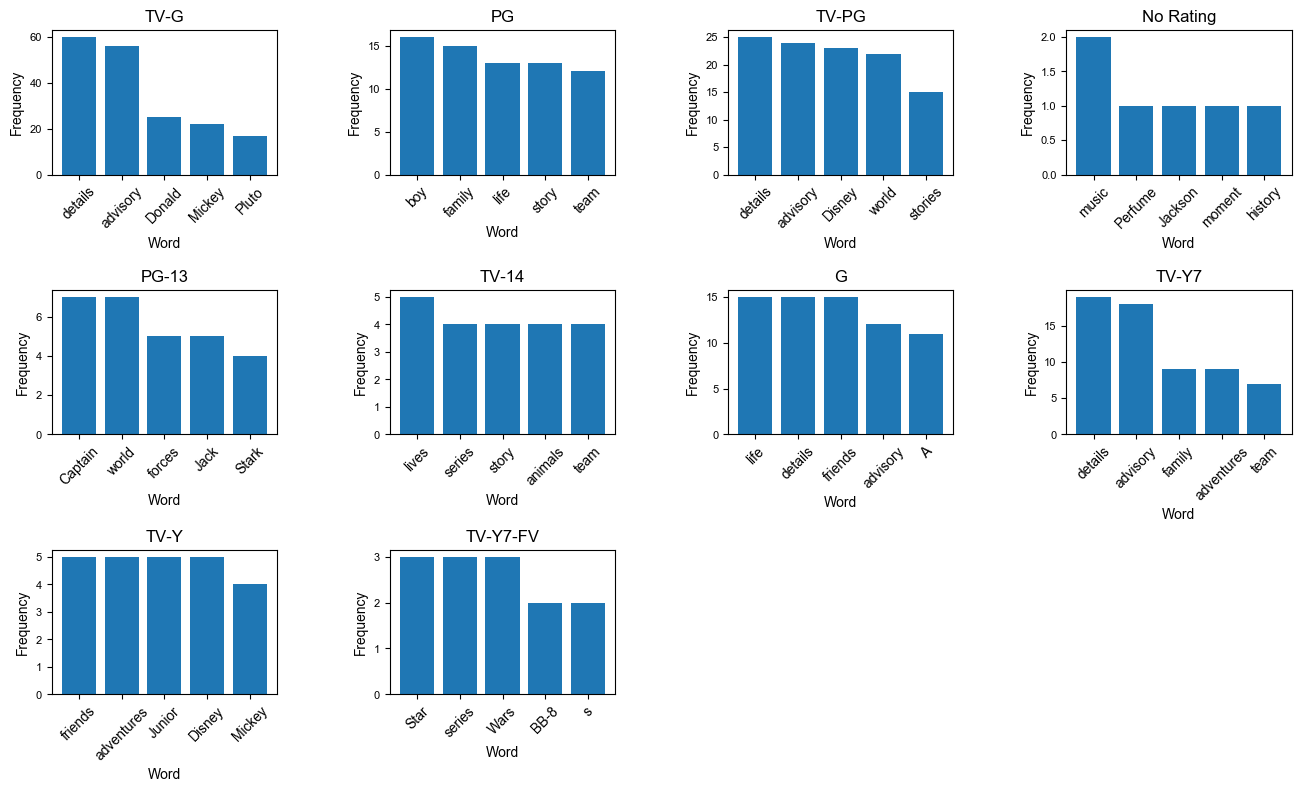

In [142]:
# Define a function to identify nouns, adjectives, and verbs (excluding "be" verbs)
def extract_pos(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    pos = [word for word, tag in pos_tags if tag.startswith('N') or (tag.startswith('J') and tag != 'JJ') or (tag.startswith('V') and not tag.startswith('VB')) and '-' not in word and "'" not in word]
    return pos

# Define the list of ratings
ratings = dp['rating'].unique()

#delete 74 ratings
ratings = ratings[~np.isin(ratings, ['74 min', '84 min', '66 min'])]

# Create a 3x4 subplot grid for the plots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
axs = axs.flatten()

# Set the visibility of any unused subplots to False
for i in range(len(axs)):
    if i >= len(ratings):
        axs[i].set_visible(False)

#space between subplots
fig.subplots_adjust(hspace=0.8, wspace=0.5)

# Iterate over each rating and create a separate plot for each one
for i, rating in enumerate(ratings):
    # Filter the dataframe to include only titles with the chosen rating
    rating_df = dp[dp['rating'] == rating]
    
    # Combine all descriptions into a single string
    description = " ".join(rating_df['description'].fillna(""))
    
    # Extract the nouns, adjectives, and verbs (excluding "be" verbs and words with "-") from the descriptions
    pos = extract_pos(description)
    words = pd.Series(pos)
    
    #exclude '-' and "'" in words
    words = words[~words.str.contains('–')]
    words = words[~words.str.contains('’')]


    # Count the frequency of each word and select the top 10
    word_counts = words.value_counts().sort_values(ascending=False)
    top_words = word_counts.head(5)
    
    # Create a bar chart showing the top 10 most common words
    axs[i].bar(top_words.index, top_words.values)
    axs[i].set_title(rating)
    axs[i].set_xlabel("Word")
    axs[i].set_ylabel("Frequency")
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].tick_params(axis='y', labelsize=8)

# Show the plot
plt.show()


It is funny that in TV-G, they have Donlad and Mickey in frequency list